<a href="https://colab.research.google.com/github/sahilr005/ml/blob/main/Hospital_stay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

##### Task 1:- Prepare a complete data analysis report on the given data.
##### Task 2:- Create a machine learning model to predict the length of stay (in days) of apatient entering the Hospital, given various factors about their stay.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("HealthCareAnalytics.csv")
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [5]:
data.shape

(26576, 18)

In [6]:
data.isnull().sum()

case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available_Extra_Rooms_in_Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed_Grade                              5
patientid                              0
City_Code_Patient                    255
Type_of_Admission                      0
Severity_of_Illness                    0
Visitors_with_Patient                  0
Age                                    0
Admission_Deposit                      0
Stay                                   1
dtype: int64

- Fill missing values

In [7]:
p_code_m =data["City_Code_Patient"].median()
data["City_Code_Patient"].fillna(p_code_m,inplace=True)

In [8]:
bed_g_m=data["Bed_Grade"].mean()
data["Bed_Grade"].fillna(bed_g_m,inplace=True)
data.dropna(inplace=True)

In [9]:
data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,26575.000000,26575.000000,26575.000000,26575.000000,26575.000000,26575.000000,26575.000000,26575.000000,26575.000000
mean,13288.000000,18.812418,4.774487,3.099831,2.662251,65529.441844,7.022051,3.244516,4980.008881
std,7671.686038,8.632565,3.159727,1.137366,0.859057,37892.699161,4.276587,1.758027,1048.830567
min,1.000000,1.000000,1.000000,0.000000,1.000000,70.000000,1.000000,0.000000,1820.000000
25%,6644.500000,11.000000,2.000000,2.000000,2.000000,32685.000000,4.000000,2.000000,4310.000000
50%,13288.000000,21.000000,5.000000,3.000000,3.000000,64650.000000,8.000000,3.000000,4855.000000
75%,19931.500000,26.000000,7.000000,4.000000,3.000000,98455.000000,8.000000,4.000000,5495.000000
max,26575.000000,32.000000,13.000000,12.000000,4.000000,131595.000000,37.000000,24.000000,10999.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26575 entries, 0 to 26574
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            26575 non-null  int64  
 1   Hospital_code                      26575 non-null  int64  
 2   Hospital_type_code                 26575 non-null  object 
 3   City_Code_Hospital                 26575 non-null  int64  
 4   Hospital_region_code               26575 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  26575 non-null  int64  
 6   Department                         26575 non-null  object 
 7   Ward_Type                          26575 non-null  object 
 8   Ward_Facility_Code                 26575 non-null  object 
 9   Bed_Grade                          26575 non-null  float64
 10  patientid                          26575 non-null  int64  
 11  City_Code_Patient                  26575 non-null  flo

In [11]:
object_data = []

for i in data.columns:
    if data[i].dtype=="O":
      object_data.append(i)
      print(i,data[i].unique())
      print("\t")

Hospital_type_code ['c' 'e' 'b' 'a' 'f' 'd' 'g']
	
Hospital_region_code ['Z' 'X' 'Y']
	
Department ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
	
Ward_Type ['R' 'S' 'Q' 'P' 'T']
	
Ward_Facility_Code ['F' 'E' 'D' 'B' 'A' 'C']
	
Type_of_Admission ['Emergency' 'Trauma' 'Urgent']
	
Severity_of_Illness ['Extreme' 'Moderate' 'Minor']
	
Age ['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' 'Nov-20' '0-10'
 '91-100']
	
Stay ['0-10' '41-50' '31-40' 'Nov-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']
	


* we can see the columns  **Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code** has no hierarchy and order.But the columns **Type_of_Admission,Severity_of_Illness,Age,Stay** has an order.
it is observed there is an error in **STAY and AGE** columns (NOV-20)..
it is also observed that most of the columns are categorical column values are unordered too

In [12]:
# Replace Nov-20 with - 10-20 range &
# More than 100 Days replace with <100

data.replace({"Nov-20":"10-20" ,"More than 100 Days":"<100"},inplace=True)

Text(0.5, 1.0, 'Hospital_type_code')

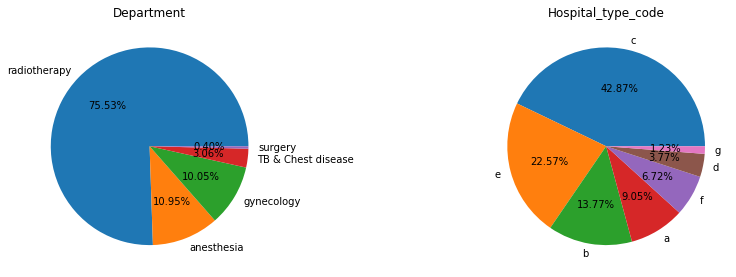

In [13]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0, 0))
plt.pie(data["Department"].value_counts(),autopct="%0.2f%%",labels=data["Department"].unique())
plt.title("Department")

ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(data["Hospital_type_code"].value_counts(),autopct="%0.2f%%",labels=data["Hospital_type_code"].unique())
plt.title("Hospital_type_code")

- 27% patient recover between 10 days
- 24% patient recover between 40-50 days

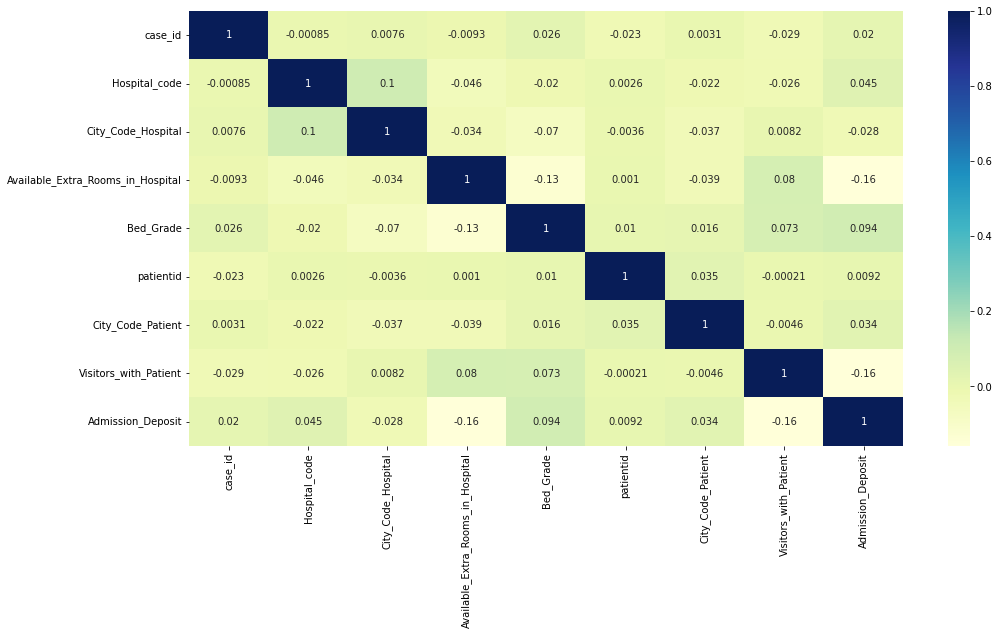

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(ax=ax, data=data.corr(), cmap="YlGnBu", annot=True)

### UNIVARIATE ANALYSIS

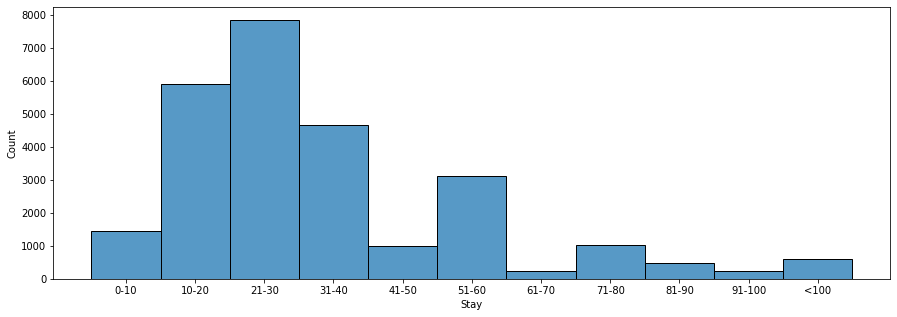

In [15]:
plt.figure(figsize=(15,5))
sns.histplot(x=data["Stay"].sort_values())

- most of patient recover within 30 days
- Average patient stay in hospital 10-30 days

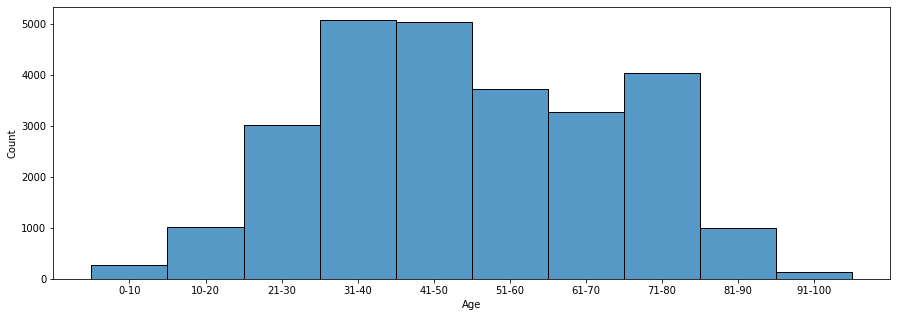

In [16]:
plt.figure(figsize=(15,5))
sns.histplot(data["Age"].sort_values())

- A large percentage of those who go to the hospital are between the ages of 20 an 60...*

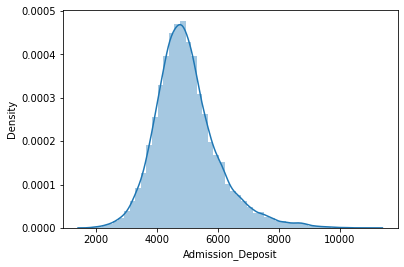

In [17]:
sns.distplot(data["Admission_Deposit"])

In [18]:
print(data["Admission_Deposit"].mean())
print(data["Admission_Deposit"].min())
print(data["Admission_Deposit"].max())

4980.008880526811
1820
10999


* Minimum Admission deposit paid is 1800 and maximum is 11008 
* The patients were paid an average 4880 as admission deposit 
* Most patients were paid between 3000 to 6000 


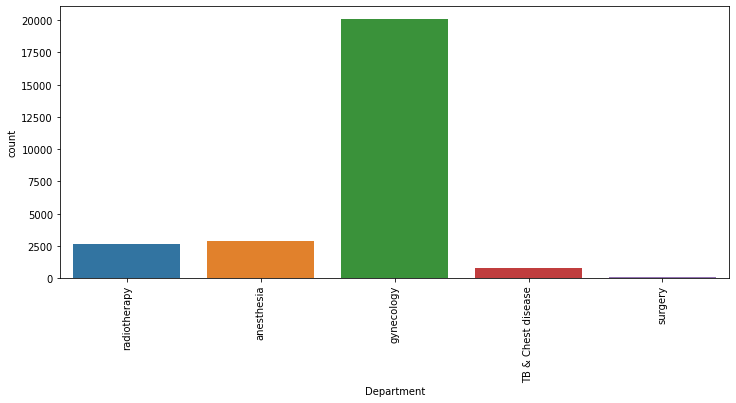

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x ='Department', data = data)
plt.xticks(rotation=90)
plt.show()

In [20]:
fig7=px.sunburst(data,path=['Department'])
fig7.update_layout(title='Age (in years) and Severity of Illness',title_x=0.5)
fig7.show()

- Most of the patients was admitted with gynecology dept(78.35%) 
- Rest of dept with lesser in percentage

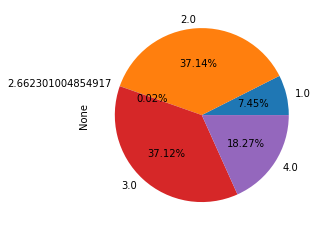

In [21]:
data.groupby("Bed_Grade").size().plot(kind='pie', autopct='%.2f%%')
plt.show()

- Mostly hospitals were provided **2 and 3** Grade Beds to patients...
- only 8.3% grade **1** beds were provided to patients and 18% got grade **4** beds too


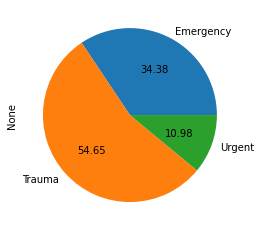

In [22]:
data.groupby("Type_of_Admission").size().plot(kind='pie', autopct='%.2f')
plt.show()

- 47.81% of patients were admitted as Trauma,37% patients as Emergency and 15% as Urgent 

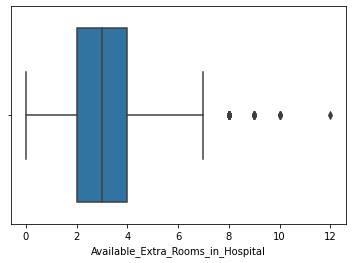

In [23]:
sns.boxplot(data["Available_Extra_Rooms_in_Hospital"])

- There was 2 to 4 extra beds are available in most of the hospitals..Maximum 24 extra beds were availbale in one of the hosptal and 15 hospitals has no extra beds..

### Bivariate and Multivariate Analysis

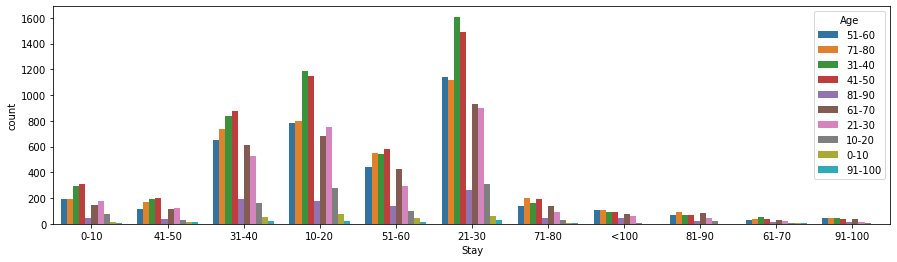

In [24]:
plt.figure(figsize=(15,4))
sns.countplot(x=data["Stay"],hue=data["Age"])

- Data distribution is higher in **10 to 30 days Stay** group and most of the apatients irrespective of age recovering within 10to 40 days..By looking into the **Age** group less than 10 is 
recovering more faster than others.. As the **Age** increasing days of stay also increasing..

In [25]:
data2 = data.drop(["case_id","Hospital_code","patientid"],axis=1)

- convert range category data to number, using LabelEncoder

In [26]:
h_c = LabelEncoder().fit(data2["Hospital_type_code"])
hrc = LabelEncoder().fit(data2["Hospital_region_code"])
dp  = LabelEncoder().fit(data2["Department"])
wd  = LabelEncoder().fit(data2["Ward_Type"])
wfc = LabelEncoder().fit(data2["Ward_Facility_Code"])
ta  = LabelEncoder().fit(data2["Type_of_Admission"])
si  = LabelEncoder().fit(data2["Severity_of_Illness"])
age = LabelEncoder().fit(data2["Age"])
stay = LabelEncoder().fit(data2["Stay"])

data2["Hospital_type_code"] = h_c.transform(data2["Hospital_type_code"])
data2["Hospital_region_code"] = hrc.fit_transform(data2["Hospital_region_code"])
data2["Department"] = dp.fit_transform(data2["Department"])
data2["Ward_Type"] = wd.fit_transform(data2["Ward_Type"])
data2["Ward_Facility_Code"] = wfc.fit_transform(data2["Ward_Facility_Code"])
data2["Type_of_Admission"] = ta.fit_transform(data2["Type_of_Admission"])
data2["Severity_of_Illness"] = si.fit_transform(data2["Severity_of_Illness"])
data2["Age"] = age.fit_transform(data2["Age"])
data2["Stay"] = stay.fit_transform(data2["Stay"])

In [27]:
x = data2.drop(["Stay"],axis=1)
y = data2["Stay"]

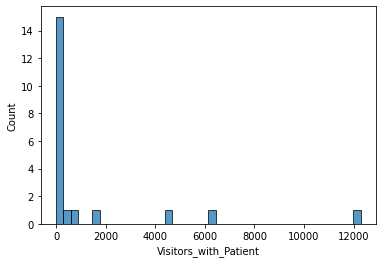

In [28]:
sns.histplot(data.Visitors_with_Patient.value_counts())

In [29]:
print(data['Visitors_with_Patient'].mean())
print(data['Visitors_with_Patient'].min())
print(data['Visitors_with_Patient'].max())

3.2445155221072435
0
24


* There is a positive and variables are moderatly correlated between Stay and Visters with patient
* Average number of people visted the patients are 3 ..minimum is 0 and maximum is 32..

In [30]:
data2[["Stay","Visitors_with_Patient"]].corr()

,Stay,Visitors_with_Patient
Stay,1.000000,0.566436
Visitors_with_Patient,0.566436,1.000000


In [31]:
plt.figure(figsize=(15,4))
fig8=px.sunburst(data,path=["Severity_of_Illness",'Visitors_with_Patient',],width=900,
    height=400)
fig8.update_layout(title='Severity_of_Illness and Visitors_with_Patient',title_x=0.3)
fig8.update_traces(textinfo="label+percent parent")

fig9=px.sunburst(data,path=["Type_of_Admission",'Visitors_with_Patient',],width=700,
    height=400)
fig9.update_layout(title='Type_of_Admission and Visitors_with_Patient',title_x=0.3)
fig9.update_traces(textinfo="label+percent parent")
fig8.show()
fig9.show()

<Figure size 1080x288 with 0 Axes>

* By looking into the chart of Severty of ileness,Type of admission  and number of visiters the highest number of visters were 2 
and then followed by 4 and 3..But in moderate and extreme cases visters numbers were increased and also increased in emergency and trauma cases 

**Severity of Illness and Age groups**


In [32]:
fig2=px.sunburst(data,path=["Severity_of_Illness",'Age',])
fig2.update_layout(title='Age (in years) and Severity of Illness',title_x=0.3)
fig2.update_traces(textinfo="label+percent parent")
fig2.show()

* In 55% Moderate cases,most of the patients are between the age group of 20 and 50
* patients between 30 and 60 age,as the age increases extreme cases are also increasing
* is minor cases was treated almost equally BETWEEN ALL AGE GROUPS

In [33]:
fig3=px.sunburst(data,path=["Type_of_Admission","Age"])
fig3.update_layout(title='Age (in years) and Type_of_Admission',title_x=0.3)
fig3.update_traces(textinfo="label+percent parent")
fig3.show()

* Out of 48% Trauma admimission and Out of 37% Trauma admimission age groups between 30 to 50 is higher
* Out of 15% urgent cases is higher in age gruop of 20 to 40 ... \
it is also indicate that 5% emergency cases are admitted below
the age group of 10..

In [34]:
fig2=px.sunburst(data,path=["Severity_of_Illness",'Stay',],width=800,
    height=600)
fig2.update_layout(title='Age and Severity of Illness',title_x=0.3)
fig2.update_traces(textinfo="label+percent parent")
fig2.show()

In [35]:
fig3=px.sunburst(data,path=["City_Code_Hospital",'City_Code_Patient',])
fig3.update_layout(title='A',title_x=0.3)
fig3.update_traces(textinfo="label+percent parent")
fig3.show()

* This is an important thing,around 12400 patients are from **city code 8** and the there is no hospital in this city..
Also it is evident that the patients from the **city code 8** depends another city hospitals heavily

**City_Code_Patients and Type_of_Admission**

In [36]:
fig4=px.sunburst(data,path=["City_Code_Patient",'Type_of_Admission',"Department"])
fig4.update_layout(title='City_Code_Patients and Type_of_Admission',title_x=0.3)
fig4.update_traces(textinfo="label+percent parent")
fig4.show()

* Out of the total patients 39% patients are from city code 8 and they are depend on other hospitals for an even emergency 
situations
* From the data it is clear that 45% patients from city code 8 admitted due to Truama and 42% was admitted due to emrgency
* By looking looking into the gynacology department regarding city 8, 82% of emergency patients were admiited with gynacological emergency

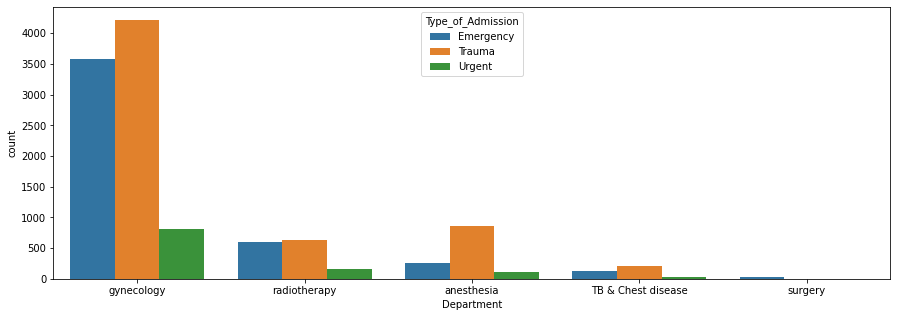

In [37]:
r=data[data.loc[:,"City_Code_Patient"]==8]
r.Department.value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x=r["Department"],hue=data["Type_of_Admission"])

In [38]:
plt.figure(figsize=(15,6))
fig4=px.sunburst(data,path=['Type_of_Admission','Stay'],width=700,
    height=400)
fig4.update_layout(title='stay and Type_of_Admission',title_x=0.3)
fig4.update_traces(textinfo="label+percent parent")
fig4.show()

<Figure size 1080x432 with 0 Axes>

* In **Trauma** cases most patients are stayed 20-30 days and then 10-20days ,normally most the
patients was recovred within 10 to 50 days
* But in **Emergency** cases recovery looks faster and 27% leaves the hospital with 10-20 days,23% leaves the hospital 
with 20-30 days.and also noticed that 12% people leaves the hospital with in 10days
leaves the hospital with 10-20 days,it may include the death category
* In **Urgent** cases 56% of patients leaves the hospitals within 10-30days and then followed by 30-40 days 


In [39]:
plt.figure(figsize=(15,6))
fig4=px.sunburst(data,path=['Severity_of_Illness','Stay'],width=700,
    height=400)
fig4.update_layout(title='stay and Type_of_Admission',title_x=0.3)
fig4.update_traces(textinfo="label+percent parent")
fig4.show()

<Figure size 1080x432 with 0 Axes>

*  Most people stayed IN gospitals was 20-30 Days and 10-30 days by comparing with type of admission
* But when we look into the extreme admission the days of stay was increasing...

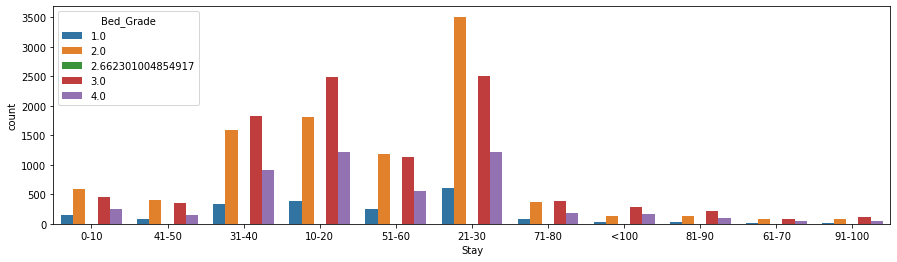

In [40]:
plt.figure(figsize=(15,4))
sns.countplot(x=data["Stay"],hue=data["Bed_Grade"])

* Patients who were recovered within 10 to 20 days mostly got beds of grade 3 but patienst who stayed above 20 days mostly got grade 2 beds followed by garde 3 and 4.Grade 1 beds are limited in numbers..Also noticed that  there is an slight increase in bed garde 4 for the patients  who are stayed more than 60 days 

**ward facility code and stay**

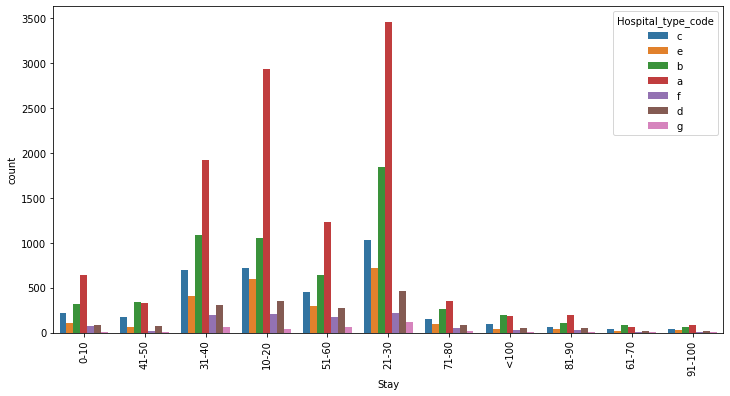

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x="Stay",hue="Hospital_type_code",data=data)
plt.xticks(rotation=90)
plt.show()

* we can see the number of patients in each type of hospitals. Hospital a has the highest number of patients and then folowed by b and c 

In [42]:
fig7=px.sunburst(data,path=['Hospital_region_code','Age','Severity_of_Illness'])
fig7.update_layout(title='Age (in years) and Severity of Illness',title_x=0.3)
fig7.update_traces(textinfo="label+percent parent")
fig7.show()

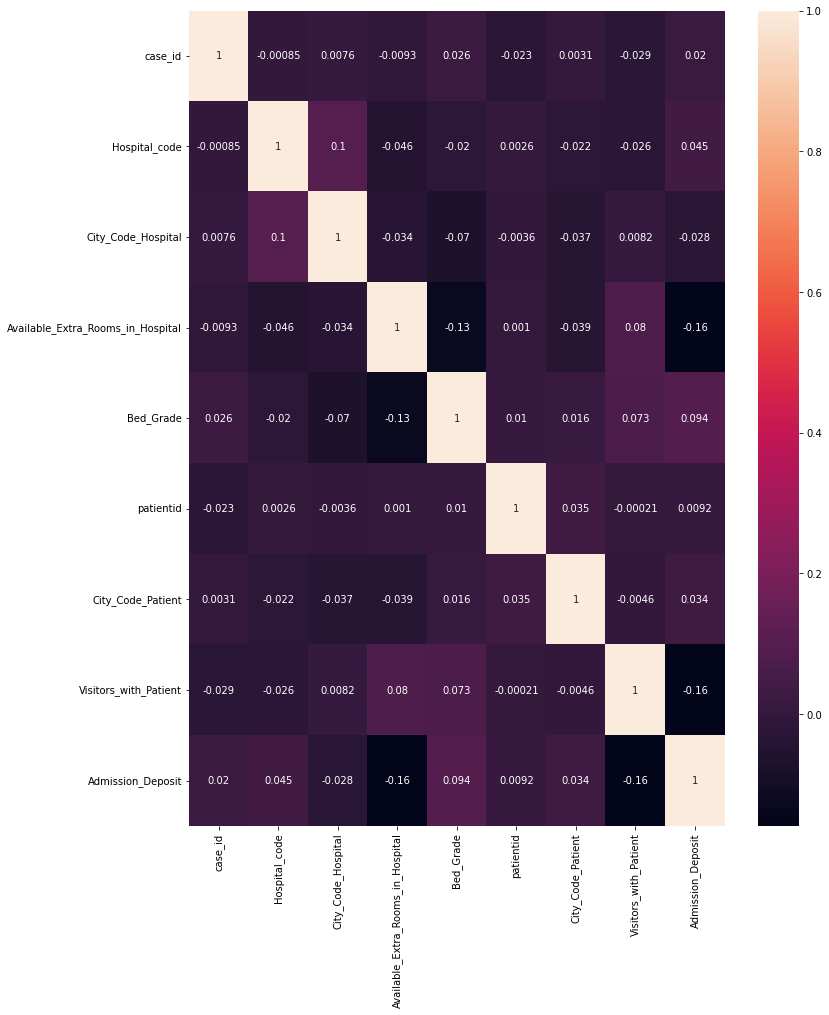

In [43]:
plt.figure(figsize=(12,15))
sns.heatmap(data.corr(),annot=True)

In [44]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity_of_Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [45]:
fig7=px.sunburst(data,path=['Bed_Grade','Admission_Deposit','Severity_of_Illness'])
fig7.update_layout(title='Age (in years) and Severity of Illness',title_x=0.3)
fig7.update_traces(textinfo="label+percent parent")
fig7.show()

## Model Building

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3)

In [47]:
model_name = []
train_score = []
test_score = []

def model_run(model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  tr_score = model.score(x_train,y_train)
  te_score =  accuracy_score(y_test,y_pred)
  model_name.append(model)
  train_score.append(tr_score)
  test_score.append(te_score)
  print(model)
  print("Train Score",tr_score)
  print("Accuracy Score",te_score)
  print("=====================================")


In [48]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
rd = RandomForestClassifier()
rid = RidgeClassifier()
dec = DecisionTreeClassifier()
ex = ExtraTreeClassifier()
his = HistGradientBoostingClassifier()
ad = AdaBoostClassifier()
kn = KNeighborsClassifier()
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

models = [rd,rid,dec,ex,his,ad,kn,bnb,gnb,mnb]
for i in models:
  model_run(i)

RandomForestClassifier()
Train Score 0.9999462423395333
Accuracy Score 0.398595258999122
RidgeClassifier()
Train Score 0.3610364476937964
Accuracy Score 0.35457167941803586
DecisionTreeClassifier()
Train Score 0.9999462423395333
Accuracy Score 0.30854132697855263
ExtraTreeClassifier()
Train Score 0.9999462423395333
Accuracy Score 0.2884735983945817
HistGradientBoostingClassifier()
Train Score 0.5376841199870982
Accuracy Score 0.4101342029349053
AdaBoostClassifier()
Train Score 0.3791527792710461
Accuracy Score 0.3713784021071115
KNeighborsClassifier()
Train Score 0.4659176432641651
Accuracy Score 0.24783644801204063
BernoulliNB()
Train Score 0.30222556714331794
Accuracy Score 0.3016430452778126
GaussianNB()
Train Score 0.37049779593592086
Accuracy Score 0.3651072369246206
MultinomialNB()
Train Score 0.34335017740027957
Accuracy Score 0.33713784021071114


### Model Report

In [49]:
model_report = pd.DataFrame([model_name,train_score,test_score]).T
model_report.columns = ["Model","Train Score","Test Score"]

In [50]:
model_report.sort_values("Test Score",ascending=False).reset_index(drop=True)

,Model,Train Score,Test Score
0,HistGradientBoostingClassifier(),0.537684,0.410134
1,"(DecisionTreeClassifier(max_features='auto', r...",0.999946,0.398595
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.379153,0.371378
3,GaussianNB(),0.370498,0.365107
4,RidgeClassifier(),0.361036,0.354572
5,MultinomialNB(),0.34335,0.337138
6,DecisionTreeClassifier(),0.999946,0.308541
7,BernoulliNB(),0.302226,0.301643
8,ExtraTreeClassifier(),0.999946,0.288474
9,KNeighborsClassifier(),0.465918,0.247836


- In HistGradientBoosting achieve best traing & test score
- HistGradientBoosting :- Histogram-based Gradient Boosting Classification Tree, is much faster than GradientBoostingClassifier